In [80]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [81]:
df = pd.read_csv("data/data.csv")
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-04-16 17:41:49 UTC,3177430,18.2,89.2,996.19,1011.69,1.33,0,135,1.28
1,2023-04-16 17:42:04 UTC,3177431,18.2,89.1,996.21,1011.71,5.32,0,135,1.28
2,2023-04-16 17:42:23 UTC,3177432,18.2,89.2,996.13,1011.63,6.65,0,135,1.28
3,2023-04-16 17:42:41 UTC,3177433,18.2,89.5,996.20,1011.70,17.29,0,180,1.28
4,2023-04-16 17:43:00 UTC,3177434,18.1,88.9,996.10,1011.59,13.97,0,180,1.28
...,...,...,...,...,...,...,...,...,...,...
95,2023-04-16 18:11:26 UTC,3177525,18.3,89.7,996.10,1011.59,8.65,0,135,1.28
96,2023-04-16 18:11:45 UTC,3177526,18.3,89.5,996.16,1011.66,7.32,0,225,1.28
97,2023-04-16 18:12:03 UTC,3177527,18.3,89.2,996.12,1011.62,5.32,0,180,1.28
98,2023-04-16 18:12:22 UTC,3177528,18.3,89.1,996.17,1011.67,0.00,0,180,1.28


In [82]:
df.drop("entry_id", axis = 1, inplace = True)

In [83]:
df

,created_at,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-04-16 17:41:49 UTC,18.2,89.2,996.19,1011.69,1.33,0,135,1.28
1,2023-04-16 17:42:04 UTC,18.2,89.1,996.21,1011.71,5.32,0,135,1.28
2,2023-04-16 17:42:23 UTC,18.2,89.2,996.13,1011.63,6.65,0,135,1.28
3,2023-04-16 17:42:41 UTC,18.2,89.5,996.20,1011.70,17.29,0,180,1.28
4,2023-04-16 17:43:00 UTC,18.1,88.9,996.10,1011.59,13.97,0,180,1.28
...,...,...,...,...,...,...,...,...,...
95,2023-04-16 18:11:26 UTC,18.3,89.7,996.10,1011.59,8.65,0,135,1.28
96,2023-04-16 18:11:45 UTC,18.3,89.5,996.16,1011.66,7.32,0,225,1.28
97,2023-04-16 18:12:03 UTC,18.3,89.2,996.12,1011.62,5.32,0,180,1.28
98,2023-04-16 18:12:22 UTC,18.3,89.1,996.17,1011.67,0.00,0,180,1.28


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  100 non-null    object 
 1   field1      100 non-null    float64
 2   field2      100 non-null    float64
 3   field3      100 non-null    float64
 4   field4      100 non-null    float64
 5   field5      100 non-null    float64
 6   field6      100 non-null    int64  
 7   field7      100 non-null    int64  
 8   field8      100 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 7.2+ KB


In [85]:
df["created_at"][0].split(" ")[-1]

'UTC'

In [86]:
df["date"] = np.nan * len(df)
df["time"] = np.nan * len(df)
df["local"] = np.nan * len(df)


In [87]:
for idx, value in enumerate(df.created_at):
    df["date"][idx] = df["created_at"][idx].split(" ")[0]

for idx, value in enumerate(df.created_at):
    df["time"][idx] = df["created_at"][idx].split(" ")[1]

for idx, value in enumerate(df.created_at):
    df["local"][idx] = df["created_at"][idx].split(" ")[-1]

In [88]:
df

,created_at,field1,field2,field3,field4,field5,field6,field7,field8,date,time,local
0,2023-04-16 17:41:49 UTC,18.2,89.2,996.19,1011.69,1.33,0,135,1.28,2023-04-16,17:41:49,UTC
1,2023-04-16 17:42:04 UTC,18.2,89.1,996.21,1011.71,5.32,0,135,1.28,2023-04-16,17:42:04,UTC
2,2023-04-16 17:42:23 UTC,18.2,89.2,996.13,1011.63,6.65,0,135,1.28,2023-04-16,17:42:23,UTC
3,2023-04-16 17:42:41 UTC,18.2,89.5,996.20,1011.70,17.29,0,180,1.28,2023-04-16,17:42:41,UTC
4,2023-04-16 17:43:00 UTC,18.1,88.9,996.10,1011.59,13.97,0,180,1.28,2023-04-16,17:43:00,UTC
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-04-16 18:11:26 UTC,18.3,89.7,996.10,1011.59,8.65,0,135,1.28,2023-04-16,18:11:26,UTC
96,2023-04-16 18:11:45 UTC,18.3,89.5,996.16,1011.66,7.32,0,225,1.28,2023-04-16,18:11:45,UTC
97,2023-04-16 18:12:03 UTC,18.3,89.2,996.12,1011.62,5.32,0,180,1.28,2023-04-16,18:12:03,UTC
98,2023-04-16 18:12:22 UTC,18.3,89.1,996.17,1011.67,0.00,0,180,1.28,2023-04-16,18:12:22,UTC


In [89]:
df.drop("created_at", axis = 1, inplace = True)

In [90]:
df

,field1,field2,field3,field4,field5,field6,field7,field8,date,time,local
0,18.2,89.2,996.19,1011.69,1.33,0,135,1.28,2023-04-16,17:41:49,UTC
1,18.2,89.1,996.21,1011.71,5.32,0,135,1.28,2023-04-16,17:42:04,UTC
2,18.2,89.2,996.13,1011.63,6.65,0,135,1.28,2023-04-16,17:42:23,UTC
3,18.2,89.5,996.20,1011.70,17.29,0,180,1.28,2023-04-16,17:42:41,UTC
4,18.1,88.9,996.10,1011.59,13.97,0,180,1.28,2023-04-16,17:43:00,UTC
...,...,...,...,...,...,...,...,...,...,...,...
95,18.3,89.7,996.10,1011.59,8.65,0,135,1.28,2023-04-16,18:11:26,UTC
96,18.3,89.5,996.16,1011.66,7.32,0,225,1.28,2023-04-16,18:11:45,UTC
97,18.3,89.2,996.12,1011.62,5.32,0,180,1.28,2023-04-16,18:12:03,UTC
98,18.3,89.1,996.17,1011.67,0.00,0,180,1.28,2023-04-16,18:12:22,UTC


In [91]:
df = df.reindex(["date", "time", "local", "field2", "field3", "field4", "field5", "field6", "field7", "field8", "field1"], axis = 1)

In [92]:
df

,date,time,local,field2,field3,field4,field5,field6,field7,field8,field1
0,2023-04-16,17:41:49,UTC,89.2,996.19,1011.69,1.33,0,135,1.28,18.2
1,2023-04-16,17:42:04,UTC,89.1,996.21,1011.71,5.32,0,135,1.28,18.2
2,2023-04-16,17:42:23,UTC,89.2,996.13,1011.63,6.65,0,135,1.28,18.2
3,2023-04-16,17:42:41,UTC,89.5,996.20,1011.70,17.29,0,180,1.28,18.2
4,2023-04-16,17:43:00,UTC,88.9,996.10,1011.59,13.97,0,180,1.28,18.1
...,...,...,...,...,...,...,...,...,...,...,...
95,2023-04-16,18:11:26,UTC,89.7,996.10,1011.59,8.65,0,135,1.28,18.3
96,2023-04-16,18:11:45,UTC,89.5,996.16,1011.66,7.32,0,225,1.28,18.3
97,2023-04-16,18:12:03,UTC,89.2,996.12,1011.62,5.32,0,180,1.28,18.3
98,2023-04-16,18:12:22,UTC,89.1,996.17,1011.67,0.00,0,180,1.28,18.3


In [93]:
df = df.rename(columns = {"field1": "target"})

In [94]:
df

,date,time,local,field2,field3,field4,field5,field6,field7,field8,target
0,2023-04-16,17:41:49,UTC,89.2,996.19,1011.69,1.33,0,135,1.28,18.2
1,2023-04-16,17:42:04,UTC,89.1,996.21,1011.71,5.32,0,135,1.28,18.2
2,2023-04-16,17:42:23,UTC,89.2,996.13,1011.63,6.65,0,135,1.28,18.2
3,2023-04-16,17:42:41,UTC,89.5,996.20,1011.70,17.29,0,180,1.28,18.2
4,2023-04-16,17:43:00,UTC,88.9,996.10,1011.59,13.97,0,180,1.28,18.1
...,...,...,...,...,...,...,...,...,...,...,...
95,2023-04-16,18:11:26,UTC,89.7,996.10,1011.59,8.65,0,135,1.28,18.3
96,2023-04-16,18:11:45,UTC,89.5,996.16,1011.66,7.32,0,225,1.28,18.3
97,2023-04-16,18:12:03,UTC,89.2,996.12,1011.62,5.32,0,180,1.28,18.3
98,2023-04-16,18:12:22,UTC,89.1,996.17,1011.67,0.00,0,180,1.28,18.3


In [95]:
df.local.value_counts()

UTC    100
Name: local, dtype: int64

In [96]:
df.local = df.local.apply(lambda x: 0 if x == "UTC" else 1)

In [97]:
df.to_csv("data/data.csv", index = False)

In [98]:
s = setup(df, target = 'target', session_id = 123)

In [99]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:51:22
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [100]:
print(best_model)

RandomForestRegressor(n_jobs=-1, random_state=123)


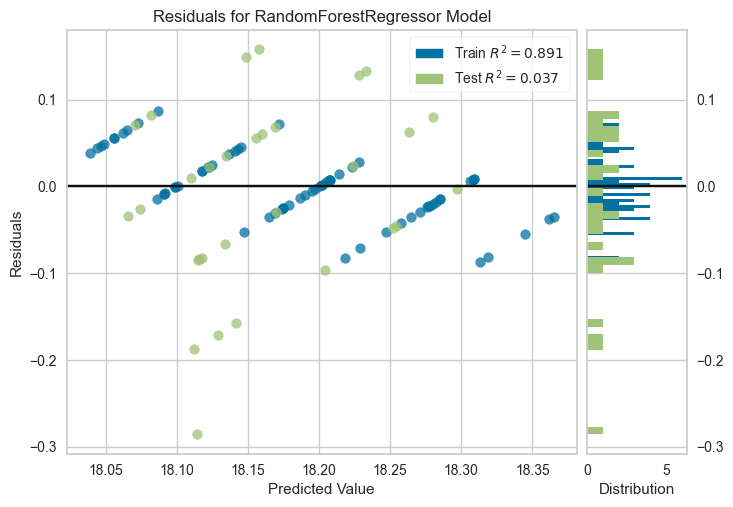

In [101]:
plot_model(best_model)

In [102]:
predictions = predict_model(best_model, data = df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0463,0.0043,0.0657,0.6616,0.0034,0.0025


,date,time,local,field2,field3,field4,field5,field6,field7,field8,target,prediction_label
0,2023-04-16,17:41:49,0,89.199997,996.190002,1011.690002,1.330000,0,135,1.28,18.200001,18.263000
1,2023-04-16,17:42:04,0,89.099998,996.210022,1011.710022,5.320000,0,135,1.28,18.200001,18.208001
2,2023-04-16,17:42:23,0,89.199997,996.130005,1011.630005,6.650000,0,135,1.28,18.200001,18.205000
3,2023-04-16,17:42:41,0,89.500000,996.200012,1011.700012,17.290001,0,180,1.28,18.200001,18.197000
4,2023-04-16,17:43:00,0,88.900002,996.099976,1011.590027,13.970000,0,180,1.28,18.100000,18.074000


In [103]:
tuned_model = tune_model(best_model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [104]:
save_model(tuned_model, "model_pickle")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Henrico\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['local', 'field2', 'field3',
                                              'field4', 'field5', 'field6',
                                              'field7', 'field8'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['date', 'time'],
                                     transformer=SimpleImputer(strategy='most_frequ...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['time'],
                                     transformer=LeaveOneOutEncoder(cols=['time'],
                                                   